# Don't Underestimate The Power of  Histogram

author: Andy Li (ckliam)

source: https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load images
img = cv2.imread('images//Lenna_(test_image).png')
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# calculate the histogram
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

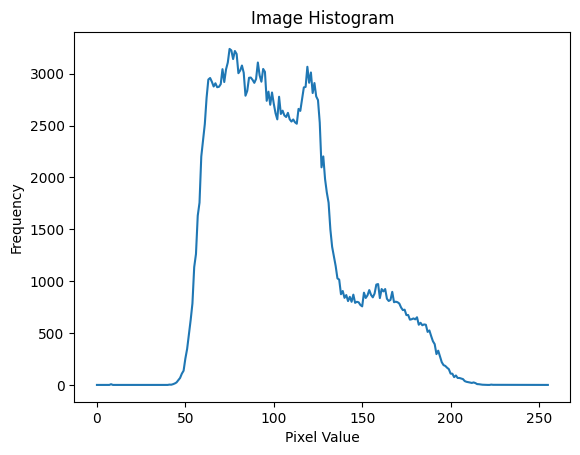

In [4]:
# plot the histogram
plt.plot(histogram)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

## Histogram Equalization
It is a method that improves the contrast in an image, in order to stretch out the intensity range 

This method is quick and easy to implement, but may increase the noise in the image.



![Histogram_Equalization_Theory_0.jpg](images/Histogram_Equalization_Theory_0.jpg)

To make it clearer, from the image above, you can see that the pixels seem clustered around the middle of the available range of intensities. What Histogram Equalization does is to stretch out this range. 

![alt text](images/Histogram_Equalization_Theory_1.jpg)

### How does it work?
Equalization implies mapping one distribution to another distribution so the intensity values are spread over the whole range.

In [ ]:
img = cv2.imread('images//image-with-too-little-contrast.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', img)
cv2.waitKey(0)

In [6]:
historgram = cv2.calcHist([img], [0], None, [256], [0, 256])

# compute the CDF of the histogram
cdf = histogram.cumsum()

# Normalize the CDF
cdf_normalized = cdf * 255 / cdf[-1]

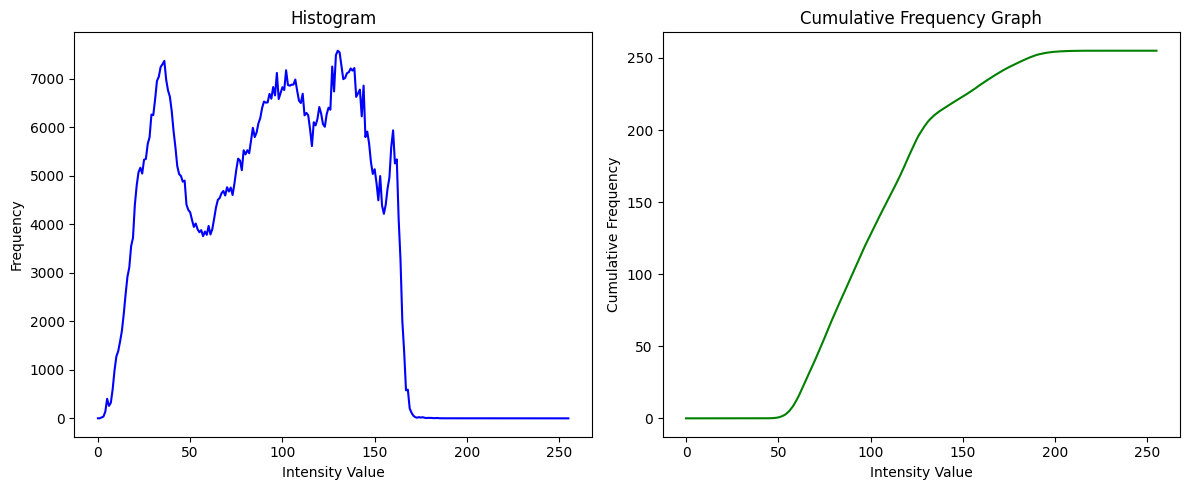

In [7]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
axes[0].plot(histogram, color='blue')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Intensity Value')
axes[0].set_ylabel('Frequency')

# Plot the cumulative frequency graph
axes[1].plot(cdf_normalized, color='green')
axes[1].set_title('Cumulative Frequency Graph')
axes[1].set_xlabel('Intensity Value')
axes[1].set_ylabel('Cumulative Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
img_tuned = cv2.equalizeHist(img)

In [9]:
histogram_tuned = cv2.calcHist([img_tuned], [0], None, [256], [0, 256])
# Compute the PDF
pdf = histogram_tuned
# Compute the CDF
cdf = pdf.cumsum()

# Normalize the CDF
cdf_normalized = cdf * 255 / cdf[-1]

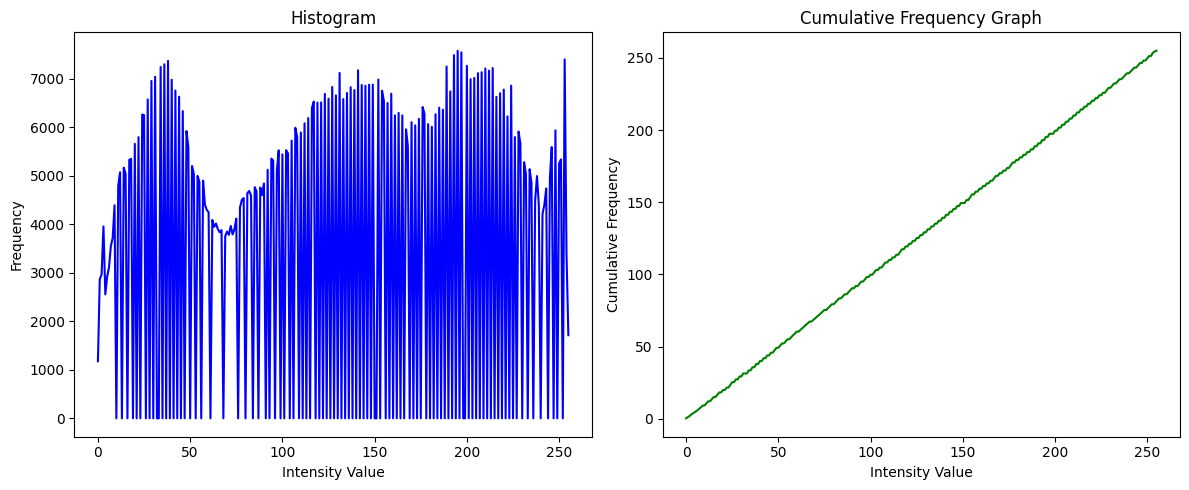

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
axes[0].plot(pdf, color='blue')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Intensity Value')
axes[0].set_ylabel('Frequency')

# Plot the cumulative frequency graph
axes[1].plot(cdf_normalized, color='green')
axes[1].set_title('Cumulative Frequency Graph')
axes[1].set_xlabel('Intensity Value')
axes[1].set_ylabel('Cumulative Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
cv2.imshow('image', img_tuned)
cv2.waitKey(0)

In [ ]:
# stitch img and img_tuned together horizontally
img_stitched = np.hstack((img, img_tuned))
# scale down the image by 25%
img_stitched = cv2.resize(img_stitched, (0, 0), None, 0.75, 0.75)
cv2.imshow('image', img_stitched)
cv2.waitKey(0)

## Histogram Equalization with RGB image (not recommended)

Histogram Equalization does not work well with colored image. But the result is quite interesting. 

In [13]:
img = cv2.imread('images//Lenna_(test_image).png')
# separate the image into its 3 color channels
b, g, r = cv2.split(img)

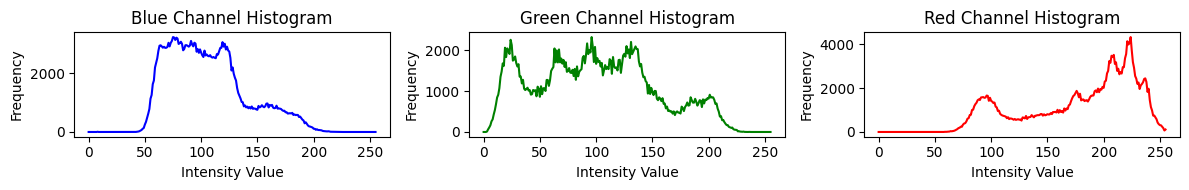

In [14]:
# plot the histograms of the 3 color channels
fig, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].plot(cv2.calcHist([b], [0], None, [256], [0, 256]), color='blue')
axes[0].set_title('Blue Channel Histogram')
axes[0].set_xlabel('Intensity Value')
axes[0].set_ylabel('Frequency')

axes[1].plot(cv2.calcHist([g], [0], None, [256], [0, 256]), color='green')
axes[1].set_title('Green Channel Histogram')
axes[1].set_xlabel('Intensity Value')
axes[1].set_ylabel('Frequency')

axes[2].plot(cv2.calcHist([r], [0], None, [256], [0, 256]), color='red')
axes[2].set_title('Red Channel Histogram')
axes[2].set_xlabel('Intensity Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# imshow the 3 color channels
cv2.imshow('Blue Channel', b)
cv2.imshow('Green Channel', g)
cv2.imshow('Red Channel', r)
cv2.waitKey(0)

In [16]:
b.shape

(512, 512)

In [17]:
# perform histogram equalization on each channel
b_tuned = cv2.equalizeHist(b)
g_tuned = cv2.equalizeHist(g)
r_tuned = cv2.equalizeHist(r)

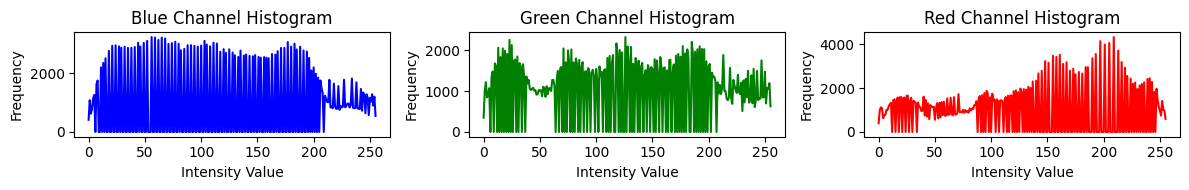

In [18]:
# plot the histograms of the 3 color channels
fig, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].plot(cv2.calcHist([b_tuned], [0], None, [256], [0, 256]), color='blue')
axes[0].set_title('Blue Channel Histogram')
axes[0].set_xlabel('Intensity Value')
axes[0].set_ylabel('Frequency')

axes[1].plot(cv2.calcHist([g_tuned], [0], None, [256], [0, 256]), color='green')
axes[1].set_title('Green Channel Histogram')
axes[1].set_xlabel('Intensity Value')
axes[1].set_ylabel('Frequency')

axes[2].plot(cv2.calcHist([r_tuned], [0], None, [256], [0, 256]), color='red')
axes[2].set_title('Red Channel Histogram')
axes[2].set_xlabel('Intensity Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
# stitch the 3 color channels back together
img_tuned = cv2.merge((b_tuned, g_tuned, r_tuned))
img_tuned = cv2.cvtColor(img_tuned, cv2.COLOR_BGR2RGB)

In [20]:
img_tuned.shape

(512, 512, 3)

In [ ]:
cv2.imshow('image after equalization', img_tuned)
cv2.waitKey(0)

In [ ]:
# stitch img and img_tuned together horizontally
img_stitched = np.hstack((img, img_tuned))
# scale down the image by 25%
img_stitched = cv2.resize(img_stitched, (0, 0), None, 0.75, 0.75)
cv2.imshow('image', img_stitched)
cv2.waitKey(0)

## Histogram Equalization with HSV image (Better)

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [97]:
img = cv2.imread("images//Lenna_(test_image).png")
# convert the image to HSV space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [98]:
# separate the image into its 3 channels, Hue, Saturation, and Value
h, s, v = cv2.split(img_hsv)

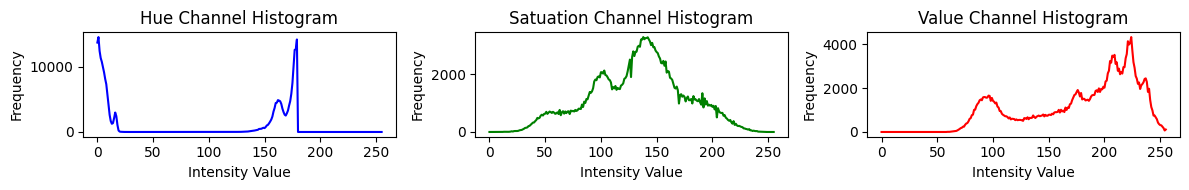

In [99]:
# plot the histograms of the 3 color channels
fig, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].plot(cv2.calcHist([h], [0], None, [256], [0, 256]), color="blue")
axes[0].set_title("Hue Channel Histogram")
axes[0].set_xlabel("Intensity Value")
axes[0].set_ylabel("Frequency")

axes[1].plot(cv2.calcHist([s], [0], None, [256], [0, 256]), color="green")
axes[1].set_title("Satuation Channel Histogram")
axes[1].set_xlabel("Intensity Value")
axes[1].set_ylabel("Frequency")

axes[2].plot(cv2.calcHist([v], [0], None, [256], [0, 256]), color="red")
axes[2].set_title("Value Channel Histogram")
axes[2].set_xlabel("Intensity Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [100]:
# perform histogram equalization on the Value channel
v_tuned = cv2.equalizeHist(v)

In [101]:
# stitch the 3 channels back together
img_tuned = cv2.merge((h, s, v_tuned))

In [102]:
# separate the image into its 3 channels, Hue, Saturation, and Value
h, s, v = cv2.split(img_tuned)

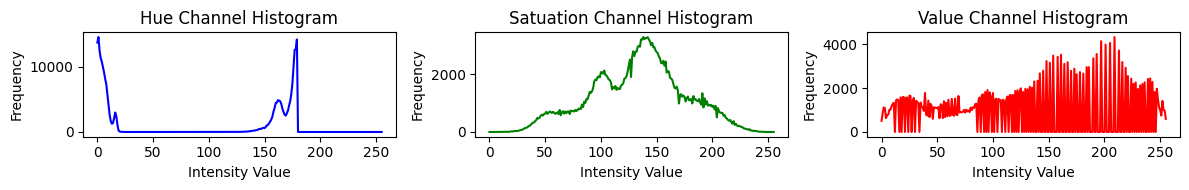

In [103]:
# plot the histograms of the 3 color channels
fig, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].plot(cv2.calcHist([h], [0], None, [256], [0, 256]), color="blue")
axes[0].set_title("Hue Channel Histogram")
axes[0].set_xlabel("Intensity Value")
axes[0].set_ylabel("Frequency")

axes[1].plot(cv2.calcHist([s], [0], None, [256], [0, 256]), color="green")
axes[1].set_title("Satuation Channel Histogram")
axes[1].set_xlabel("Intensity Value")
axes[1].set_ylabel("Frequency")

axes[2].plot(cv2.calcHist([v], [0], None, [256], [0, 256]), color="red")
axes[2].set_title("Value Channel Histogram")
axes[2].set_xlabel("Intensity Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [104]:
# convert the image back to BGR space
# stitch img and img_tuned together horizontally
img_tuned = cv2.cvtColor(img_tuned, cv2.COLOR_HSV2BGR)
img_stitched = np.hstack((img, img_tuned))
img_stitched = cv2.resize(img_stitched, (0, 0), None, 0.75, 0.75)
cv2.imshow('image', img_stitched)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Back Projection

source: https://medium.com/@kaushalkashyap4ever/computer-vision-from-scratch-ex-20-back-projection-using-histogram-49e548587934

Back projection is a way of recording how well the pixels of a given image fit the distribution of pixels in a histogram model. This is useful for things like tracking objects in a video and image segmentation.

Step 1: Calculate the Histogram of the Target Region

Step 2: Calculate the Histogram of the Entire Image

Step 3: Normalize both histograms

Step 4: Calculate Back Projection

Step 5: Display the Back Projection

In [105]:
import cv2

In [106]:
# Load the image
image = cv2.imread(r"images\bacteria.png")
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [107]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [108]:
hsv_image.shape

(1026, 934, 3)

In [109]:
# Define the target region in HSV space

y = 60
x = 70
h = 300
w = 300

# y = 0
# x = 0
# h = 30
# w = 30

target_roi = hsv_image[y : y + h, x : x + w]

In [110]:
cv2.imshow('Target Region', cv2.cvtColor(target_roi, cv2.COLOR_HSV2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [111]:
# Calculate histogram of the target region
hist_roi = cv2.calcHist(target_roi, [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize the histograms
cv2.normalize(hist_roi, hist_roi, 0, 255, cv2.NORM_MINMAX)

array([[255.        ,   0.85858583,   0.        , ...,   0.        ,
          0.        ,   0.85858583],
       [  0.        ,  28.333332  ,   0.85858583, ...,   0.        ,
          0.        ,   0.        ],
       [  0.85858583,   2.5757575 ,   4.292929  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)

In [112]:
# Calculate histogram of the entire image
hist_full = cv2.calcHist([hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(hist_full, hist_full, 0, 255, cv2.NORM_MINMAX)

array([[2.5500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 7.5507655e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7364468e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.4728937e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [113]:
# Calculate the back projection
back_projection = cv2.calcBackProject(
    [hsv_image], [0, 1], hist_roi, [0, 180, 0, 256], 2
)

In [114]:
# Display the back projection
cv2.imshow("Back Projection", back_projection)
cv2.waitKey(0)
cv2.destroyAllWindows()